In [1]:
import pandas as pd

filename = 'test_input_dataset.csv'

df = pd.read_csv(filename, usecols=['transcript'])

game = df.head(1)

In [2]:
game = df['transcript'].iloc[3]
game = game.split('\n\n')[1].strip()
print(game)

1.c4 Nf6 2.Nc3 e6 3.d4 d5 4.Nf3 Be7 5.Bf4 O-O 6.e3 Nh5 7.Be5 a6 8.g4 Nf6 9.g5 Nfd7 10.h4 dxc4 11.Bxc4 b5 12.Bd3 Bb7 13.Be4 Nc6 14.Qe2 b4 15.Na4 Na5 16.Bxb7 Nxb7 17.Rd1 Nxe5 18.dxe5 Qe8 19.b3 Na5 20.h5 c5 21.h6 Qb5 22.hxg7 Rfd8 23.Nd2 Qxe2+ 24.Kxe2 c4 25.Nb6 cxb3 26.Nxa8 bxa2 27.Nb6 Kxg7 28.Ra1 b3 29.Nxb3 Nxb3 30.Rxa2 Nc5 31.f4 Ne4 32.Rc1 a5 33.Rc7 Bc5 34.Rb2 Nc3+ 35.Kf3 Bxe3 36.Rxc3 Bd4 37.Rd3 Bxb6 38.Rd6 Bc7 39.Rc6 Rb8 40.Rxb8 Bxb8 41.Ra6 a4 42.Rxa4 Bc7 43.Ra6 Kg6 44.Kg4 Kg7 45.Ra7 Bd8 46.Rd7 Ba5 47.f5 Kg8 48.fxe6 fxe6 49.Kh5 Bb4 50.g6 hxg6+ 51.Kxg6 Kf8 52.Kf6 Ke8 53.Kxe6 Be1 54.Rb7 Kd8 55.Rb3 Kc7 56.Kf7 Bf2 57.Rc3+ Kb6 58.e6 Bh4 59.Rh3 Bd8 60.Rh6 Kb7 61.Rh8 Bg5 62.Rh5 Bf4 63.e7 Bc1 64.Rb5+ Kc7 65.e8=Q Bh6 66.Ke6 Bd2 67.Qd7#


In [4]:
def map_value(evaluation: dict) -> int:
    if evaluation['type'] == 'mate':
        # for example, 3 would be mate in 3 for white, -2 is mate in 2 for black
        if evaluation['value'] > 0:
            return 9
        else:
            return -9
    
    # if not mate, must be centipawn advantage
    value = evaluation['value']

    if value > 700:
        return 8
    elif value < -700:
        return -8
    original_min, original_max = -700, 700
    target_min, target_max = -7, 7

    # Calculate the total number of values in each range
    original_range = original_max - original_min
    target_range = target_max - target_min

    # Scale the original value to the target range
    scaled_value = ((value - original_min) / original_range) * target_range + target_min

    # Round and return the scaled value, making sure it stays within the target range
    return str(min(target_max, max(target_min, round(scaled_value))))
    
def game_over_to_value(board_result: str) -> int:
    result_map = {"1-0": 9, "0-1": -9, "1/2-1/2": 0}
    return result_map[board_result]

# your_list = range(-800, 800, 40)
# mapped_list = [map_value({"type":"cp", "value":x}) for x in your_list]

# for i in range(len(mapped_list)):
#     print(mapped_list[i], your_list[i])

In [36]:
import chess
from stockfish import Stockfish
import random
# Initializing a board
moves_string = game
# Create a new board
board = chess.Board()

mac_path = "stockfish"
# self._engine = chess.engine.SimpleEngine.popen_uci(linux_path)
stockfish = Stockfish(mac_path)
stockfish.set_depth(9) 
ten = []

# Apply each move to the board
for move in moves_string.split():
    # Skip move numbers
    if '.' in move:
        board.push_san(move.split(".")[1])
    else:
        board.push_san(move)

    

    stockfish.set_fen_position(board.fen())
    # Check for checkmate or draw
    if board.result() != "*":
        ten.append(game_over_to_value(board.result()))
    else:
        evaluation = stockfish.get_evaluation()
        # print(f"Stockfish evaluation after move {move}: {evaluation}")
        # print(evaluation)

        ten.append(map_value(evaluation))

# Display the board position after the moves
print(board.result())

1-0


In [77]:
import chess
from stockfish import Stockfish
import random
import time
# Initializing a board
moves_string = game
# Create a new board
board = chess.Board()

mac_path = "stockfish"
# self._engine = chess.engine.SimpleEngine.popen_uci(linux_path)
stockfish = Stockfish(mac_path)
stockfish.set_depth(10)
two = []
start_time = time.time()
# Apply each move to the board
for move in moves_string.split():
    # Skip move numbers
    if '.' in move:
        board.push_san(move.split(".")[1])
    else:
        board.push_san(move)

    if random.random() < 01.03:

        stockfish.set_fen_position(board.fen())
        evaluation = stockfish.get_evaluation()
        # print(evaluation)
        two.append(map_value(evaluation))

end_time = time.time()

print("total time", (end_time - start_time))

# Display the board position after the moves
print(board)

total time 3.3655645847320557
. . . . . . . .
. . k Q . . . .
. . . . K . . .
. R . . . . . .
. . . . . . . .
. . . . . . . .
. . . b . . . .
. . . . . . . .


In [75]:
print(type(two[0]))

<class 'str'>


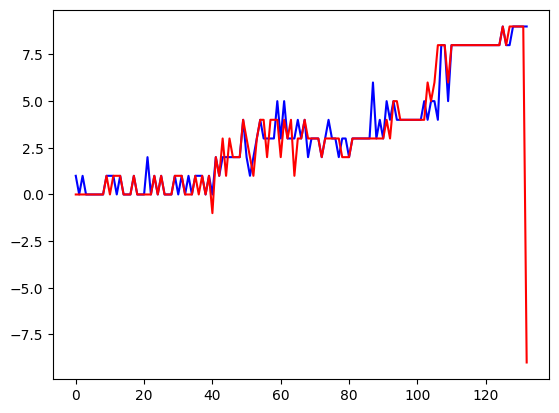

In [78]:
import matplotlib.pyplot as plt

ten = [int(i) for i in ten]
two = [int(i) for i in two]


plt.plot(ten, label='ten', color='blue')
plt.plot(two, color='red')

plt.show()

In [40]:
# import matplotlib.pyplot as plt

# ten_map = [map_value(x) for x in ten]
# two_map = [map_value(x) for x in two]

# plt.plot(ten_map, label='ten', color='blue')
# plt.plot(two_map, label='Two', color='red')

# plt.show()